In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
df = pd.read_csv("./data/MSResource/MSResource_0.csv")

In [7]:
msnames = df['msname'].unique()
msinstanceids = df['msinstanceid'].unique()
nodeids = df['nodeid'].unique()
len(msnames), len(msinstanceids), len(nodeids)

In [28]:
def vs_time(x):
    instance_df = df[df['msinstanceid']==msinstanceids[x]].copy()
    instance_df.sort_values('timestamp', inplace=True)
    instance_df.plot(x='timestamp', y='instance_cpu_usage')
    plt.show()
    instance_df.plot(x='timestamp', y='instance_memory_usage')
    plt.show()

In [30]:
interact(vs_time, x=widgets.IntSlider(min=0, max=len(msinstanceids)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='x', max=96378), Output()), _dom_classes=('widget-interac…

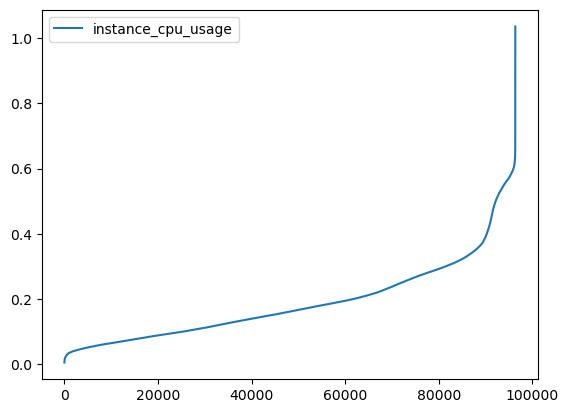

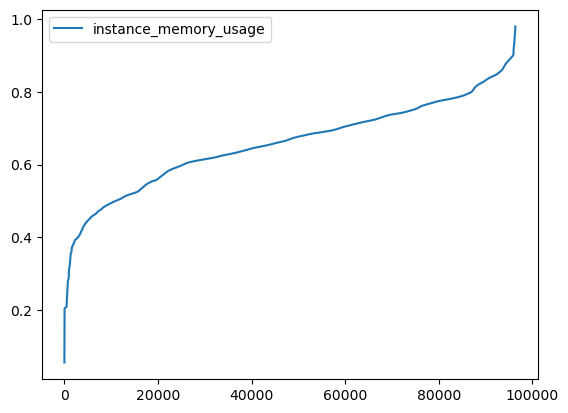

In [46]:
def by_instance():
    mean_df = df.groupby('msinstanceid', as_index=False)[['instance_memory_usage', 'instance_cpu_usage']].mean()
    mean_df = mean_df.sort_values('instance_cpu_usage').reset_index(drop=True)
    mean_df.plot(use_index=True, y='instance_cpu_usage')
    plt.show()
    mean_df = mean_df.sort_values('instance_memory_usage').reset_index(drop=True)
    mean_df.plot(use_index=True, y='instance_memory_usage')
    plt.show()
by_instance()